In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
# Load dataset
df = pd.read_csv('/content/creditcard.csv')

# Feature standardization
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])


In [21]:
# Random undersampling
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0].sample(n=len(fraud_df), random_state=42)
balanced_df = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=42)


In [22]:
# Prepare features and target
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

In [23]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

<ipython-input-24-c57bb4f4608c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


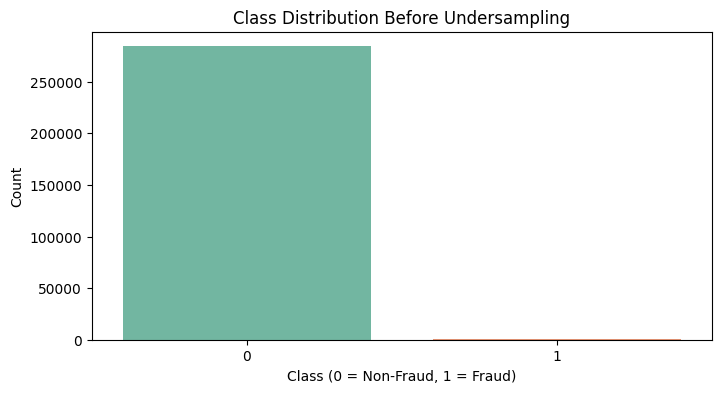

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution before undersampling
plt.figure(figsize=(8,4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Class Distribution Before Undersampling')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


<ipython-input-25-b3c661869f19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=balanced_df, palette='Set1')


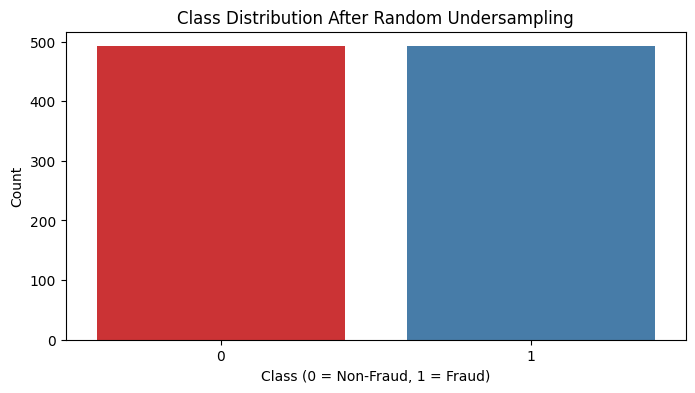

In [25]:
# Plot class distribution after undersampling
plt.figure(figsize=(8,4))
sns.countplot(x='Class', data=balanced_df, palette='Set1')
plt.title('Class Distribution After Random Undersampling')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

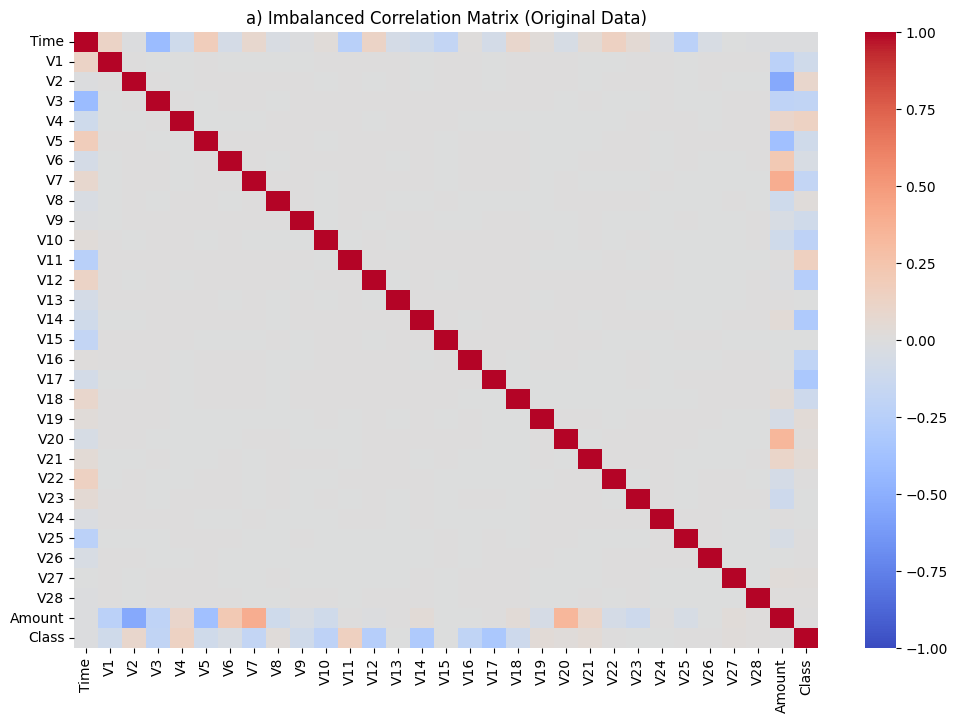

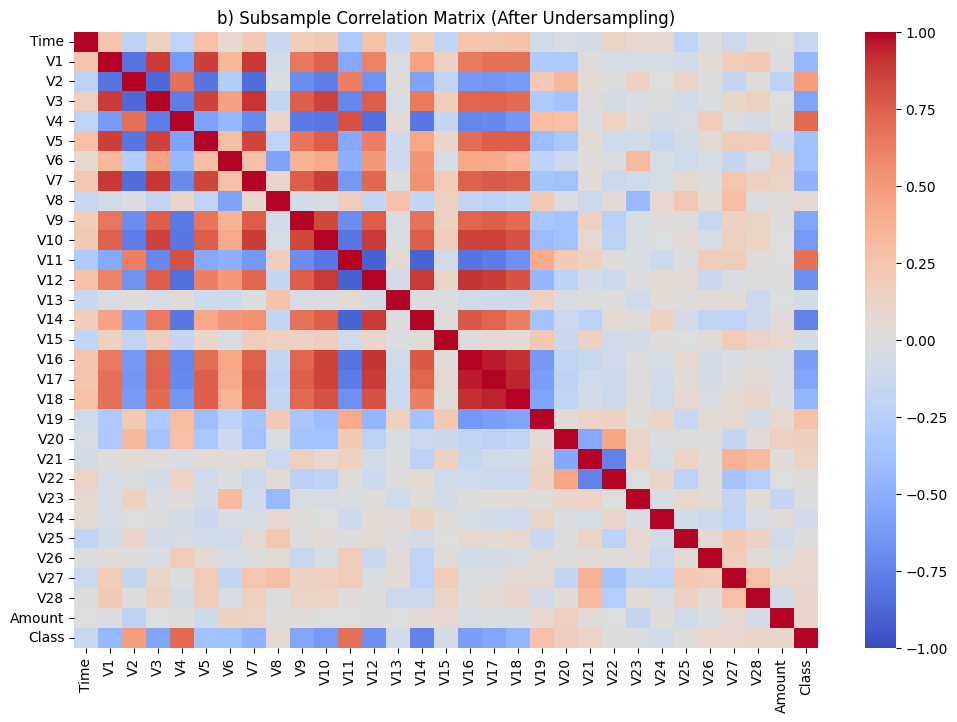

In [26]:
# c) Feature Correlation Analysis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('a) Imbalanced Correlation Matrix (Original Data)')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(balanced_df.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('b) Subsample Correlation Matrix (After Undersampling)')
plt.show()

# **Model** **Integration**

##Neural Networks

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6588 - loss: 1.2407 - precision: 0.7646 - recall: 0.4239 - val_accuracy: 0.9241 - val_loss: 0.3035 - val_precision: 0.8889 - val_recall: 0.9756
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8502 - loss: 0.3367 - precision: 0.8134 - recall: 0.9185 - val_accuracy: 0.9494 - val_loss: 0.1972 - val_precision: 0.9405 - val_recall: 0.9634
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9108 - loss: 0.2517 - precision: 0.9546 - recall: 0.8660 - val_accuracy: 0.9494 - val_loss: 0.1480 - val_precision: 0.9625 - val_recall: 0.9390
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9243 - loss: 0.2081 - precision: 0.9756 - recall: 0.8729 - val_accuracy: 0.9557 - val_loss: 0.1372 - val_precision: 0.9630 - val_recall: 0.9512
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9256 - loss: 0.1782 - precision: 0.9768 - recall: 0.8703 - val_accuracy: 0.9494 - val_loss: 0.1317 - val_precisio

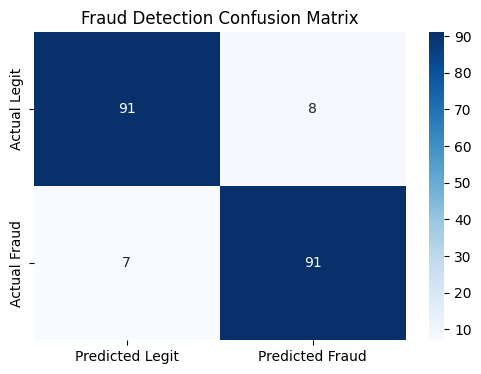

In [27]:
# Neural Network Implementation & Evaluation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Neural Network Architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

# Class weights for imbalance handling (even after undersampling)
class_weight = {0: 1, 1: 1}  # Equal weights for 50/50 balanced data

# Model Training
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weight,
                    verbose=1)

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Performance Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraud']))

# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Legit', 'Predicted Fraud'],
            yticklabels=['Actual Legit', 'Actual Fraud'])
plt.title('Fraud Detection Confusion Matrix')
plt.show()


##NN+SMORT

Class distribution after SMOTE:
Class
0    394
1    394
Name: count, dtype: int64
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.4811 - loss: 2.8776 - precision: 0.1934 - recall: 0.0160 - val_accuracy: 0.4873 - val_loss: 1.3654 - val_precision: 0.5000 - val_recall: 0.0123
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5239 - loss: 1.5692 - precision: 0.5871 - recall: 0.1498 - val_accuracy: 0.8608 - val_loss: 0.5354 - val_precision: 0.8734 - val_recall: 0.8519
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6988 - loss: 0.7124 - precision: 0.7205 - recall: 0.6284 - val_accuracy: 0.7722 - val_loss: 0.4008 - val_precision: 0.6957 - val_recall: 0.9877
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7434 - loss: 0.4672 - precision: 0.6959 - recall: 0.8640 - val_accuracy: 0.7468 - val_loss: 0.3914 - val_precision: 0.6723 - val_recall: 0.9877
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7343 - loss: 0.4500 - precision: 0.6718 - recall: 0.9252 - val_accuracy: 0.7468 - val_loss: 0.3849 - val_precision: 0.6

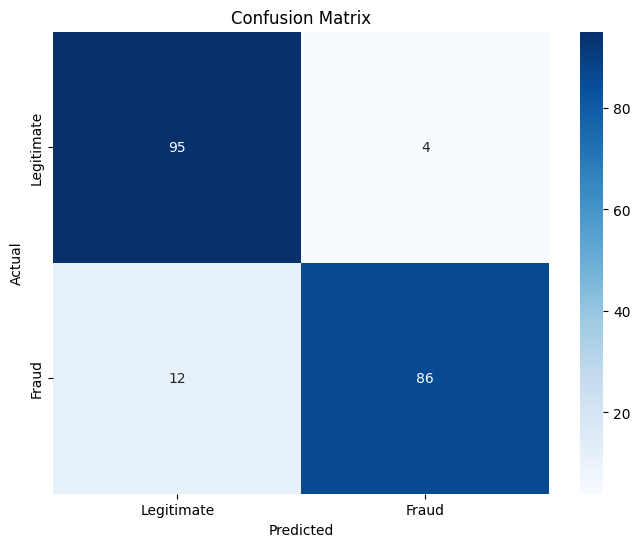

In [33]:

# SMOTE implementation
def apply_smote(X_train, y_train):
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    print("Class distribution after SMOTE:")
    print(pd.Series(y_res).value_counts())
    return X_res, y_res

# Neural network architecture
def create_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall')])
    return model

# Training and evaluation
def train_model(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=256,
                        validation_split=0.2,
                        verbose=1)

    y_pred = (model.predict(X_test) > 0.5).astype(int)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraud']))

    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legitimate', 'Fraud'],
                yticklabels=['Legitimate', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return history

# Execute full workflow
X_train_smote, y_train_smote = apply_smote(X_train, y_train)
model = create_model(X_train_smote.shape[1])
history = train_model(model, X_train_smote, y_train_smote, X_test, y_test)

##MLP


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# MLP Architecture
mlp_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model
mlp_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = mlp_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5270 - loss: 0.7236 - val_accuracy: 0.7215 - val_loss: 0.4104
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6765 - loss: 0.5045 - val_accuracy: 0.8544 - val_loss: 0.3467
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7731 - loss: 0.4349 - val_accuracy: 0.9367 - val_loss: 0.2931
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8471 - loss: 0.3559 - val_accuracy: 0.9557 - val_loss: 0.2522
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8876 - loss: 0.3289 - val_accuracy: 0.9430 - val_loss: 0.2213
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9085 - loss: 0.2883 - val_accuracy: 0.9494 - val_loss: 0.1998
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9004 - loss: 0.2874 - val_accuracy: 0.9557 - val_loss: 0.1834
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9020 - loss: 0.2622 - val_accuracy: 0.9557 - val_loss: 0.170

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


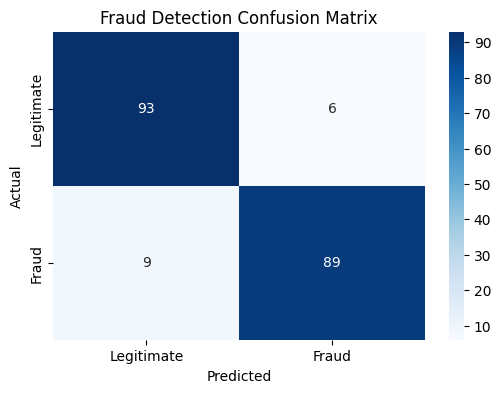


Classification Report:
              precision    recall  f1-score   support

  Legitimate     0.9118    0.9394    0.9254        99
       Fraud     0.9368    0.9082    0.9223        98

    accuracy                         0.9239       197
   macro avg     0.9243    0.9238    0.9238       197
weighted avg     0.9242    0.9239    0.9238       197



In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred = (mlp_model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Fraud Detection Confusion Matrix')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4, target_names=['Legitimate', 'Fraud']))


##Random Forest

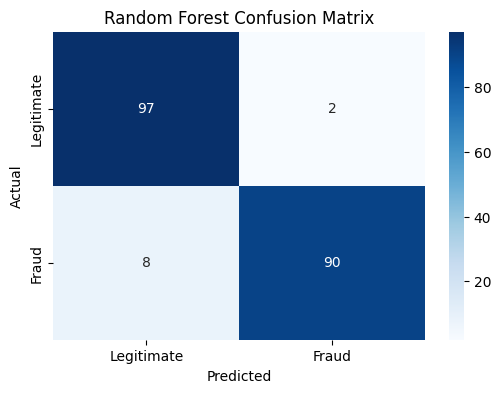


Classification Report:
              precision    recall  f1-score   support

  Legitimate     0.9238    0.9798    0.9510        99
       Fraud     0.9783    0.9184    0.9474        98

    accuracy                         0.9492       197
   macro avg     0.9510    0.9491    0.9492       197
weighted avg     0.9509    0.9492    0.9492       197



In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
rf_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_pred, digits=4, target_names=['Legitimate', 'Fraud']))


##Logistic Regression

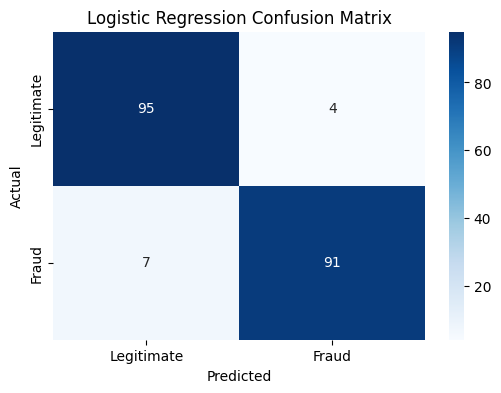


Classification Report:
              precision    recall  f1-score   support

  Legitimate     0.9314    0.9596    0.9453        99
       Fraud     0.9579    0.9286    0.9430        98

    accuracy                         0.9442       197
   macro avg     0.9446    0.9441    0.9441       197
weighted avg     0.9446    0.9442    0.9441       197



In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on test data
logreg_pred = logreg.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, logreg_pred, digits=4, target_names=['Legitimate', 'Fraud']))


##KNN

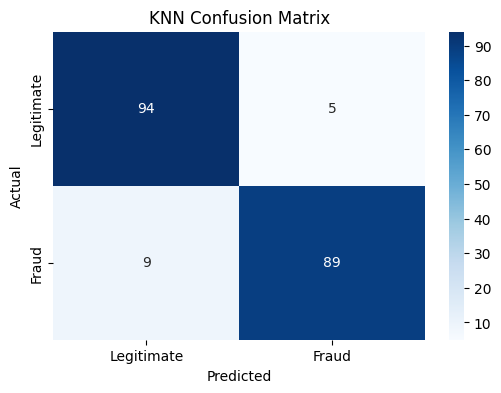


Classification Report:
              precision    recall  f1-score   support

  Legitimate     0.9126    0.9495    0.9307        99
       Fraud     0.9468    0.9082    0.9271        98

    accuracy                         0.9289       197
   macro avg     0.9297    0.9288    0.9289       197
weighted avg     0.9296    0.9289    0.9289       197



In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
knn_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, knn_pred, digits=4, target_names=['Legitimate', 'Fraud']))


##SVM

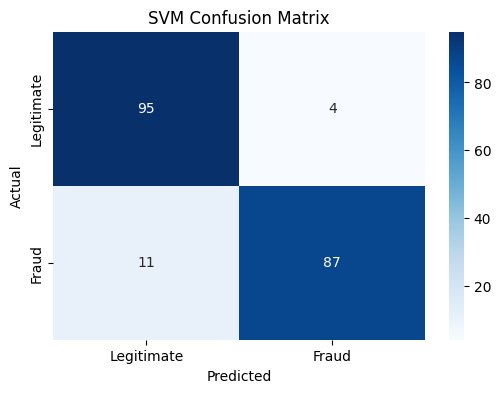


Classification Report:
              precision    recall  f1-score   support

  Legitimate     0.8962    0.9596    0.9268        99
       Fraud     0.9560    0.8878    0.9206        98

    accuracy                         0.9239       197
   macro avg     0.9261    0.9237    0.9237       197
weighted avg     0.9260    0.9239    0.9237       197



In [42]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train SVM classifier (RBF kernel is default)
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Predict on test data
svm_pred = svm.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, svm_pred, digits=4, target_names=['Legitimate', 'Fraud']))


# **RESULTS**

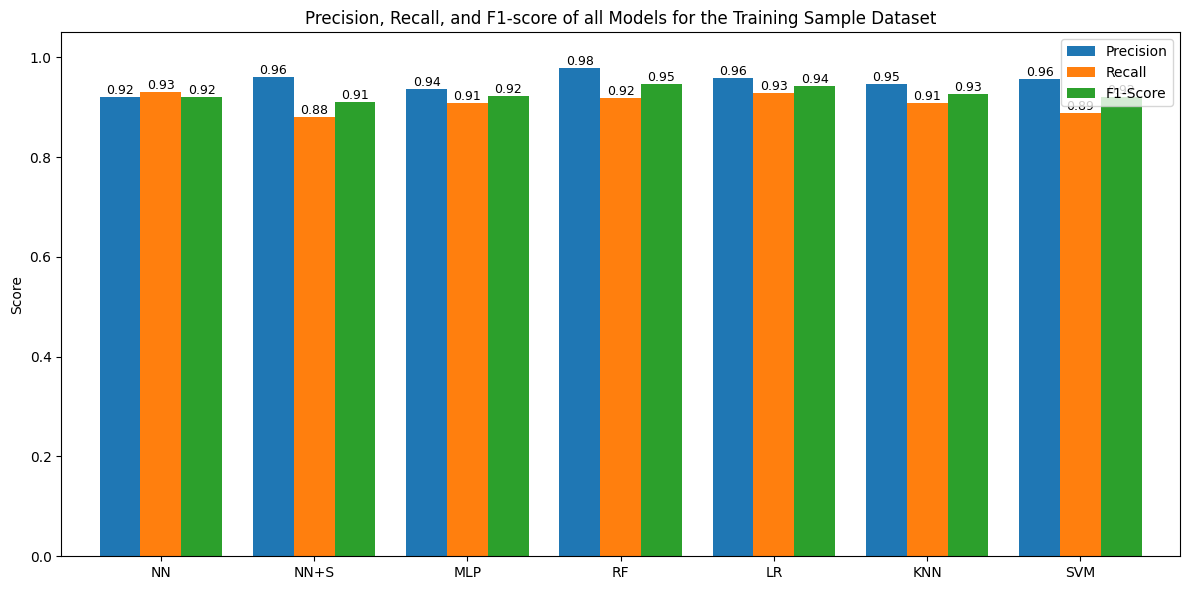

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example DataFrame structure; replace with your actual results
results_df = pd.DataFrame({
    'Precision':   [0.92, 0.96, 0.9368, 0.9783, 0.9579, 0.9468, 0.9560],
    'Recall':      [0.93, 0.88, 0.9082, 0.9184, 0.9286, 0.9082, 0.8878],
    'F1-Score':    [0.92, 0.91, 0.9223, 0.9474, 0.9430, 0.9271, 0.9206]
}, index=['NN', 'NN+S', 'MLP', 'RF', 'LR', 'KNN', 'SVM'])

# Plot grouped bar chart
ax = results_df.plot(kind='bar', figsize=(12,6), width=0.8)

plt.title('Precision, Recall, and F1-score of all Models for the Training Sample Dataset')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(title="", loc='upper right')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
